In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Input Data

In [2]:
# Read data from sqlite3
con = sqlite3.connect('../Dataset/hotel-directories-bali.sqlite3')
df_hotel = pd.read_sql_query("SELECT * FROM hotel_bali", con)
df_room = pd.read_sql_query("SELECT * FROM hotel_room_bali", con)

In [3]:
print('Hotel Table Columns :')
print(df_hotel.columns)
print('-' * 50)

print('Room Table Columns :')
print(df_room.columns)

Hotel Table Columns :
Index(['id', 'type', 'name', 'displayName', 'description', 'link', 'address',
       'region', 'city', 'province', 'country', 'geodirectoryId', 'postal',
       'image', 'images', 'facilities', 'properties',
       'nearestPointOfInterests', 'starRating', 'userRating', 'userRatingInfo',
       'numReviews', 'latitude', 'longitude'],
      dtype='object')
--------------------------------------------------
Room Table Columns :
Index(['id', 'hotelId', 'name', 'images', 'roomType', 'description',
       'originalDescription', 'bedDescription', 'size', 'rate', 'originalRate',
       'maxOccupancy', 'baseOccupancy', 'maxChildOccupancy', 'maxChildAge',
       'numExtraBeds', 'numChargedRooms', 'numRemainingRooms',
       'numBreakfastIncluded', 'isBreakfastIncluded', 'isWifiIncluded',
       'isRefundable', 'hasLivingRoom', 'extraBedIsIncluded', 'facilities'],
      dtype='object')


- A lot of column in the dataset are not useful for our analysis and model. We will drop them.

## Drop Unnecessary Column

### Query Hotel data

In [4]:
count = 0
for i in df_hotel.columns:
    if df_hotel[i].nunique() == 1:
        count += 1
        print(f'{i}: {df_hotel[i].nunique()}')
if count == 0:
    print('No columns with only one unique value')

region: 1
province: 1
country: 1
geodirectoryId: 1


In [5]:
# Read hotel data
df_hotel = pd.read_sql_query(
    '''
    SELECT
        id,
        "type",
        city,
        facilities,
        "nearestPointOfInterests",
        "starRating"
    FROM
        hotel_bali
    ''', 
    con)

Description:
- Drop the column with no relation to price estimation (`name`,`displayName`, `description`, `link`, `postal`, `image`, `images`)
- Drop the column with only 1 unique value (`country`,`region`,`geodirectoryId`, `province`)
- Drop `address`, `latitude`, `longitude` because hotel position are represented by `city` column

In [6]:
df_hotel.head(4)

,id,type,city,facilities,nearestPointOfInterests,starRating
0,148997,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0
1,3000010016201,Resor,Badung,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",5.0
2,1000000531091,Hotel,Denpasar,"[""CARPARK"",""COFFEE_SHOP"",""HAS_24_HOUR_ROOM_SER...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",3.0
3,409115,Hotel,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0


### Query Hotel Room data

In [7]:
count = 0
for i in df_room.columns:
    if df_room[i].nunique() == 1:
        count += 1
        print(f'{i}: {df_room[i].nunique()}')
if count == 0:
    print('No columns with only one unique value')

numExtraBeds: 1
numChargedRooms: 1
extraBedIsIncluded: 1


In [8]:
# Read room data
df_room = pd.read_sql_query(
    ''' 
    SELECT
        id,
        "hotelId",
        "bedDescription",
        "size",
        "originalRate",
        "baseOccupancy",
        "maxChildOccupancy",
        "maxChildAge",
        "numBreakfastIncluded",
        "isBreakfastIncluded",
        "isWifiIncluded",
        "isRefundable",
        "hasLivingRoom",
        facilities
    FROM
        hotel_room_bali
    ''', 
    con)

Description:
- Drop the column with no relation to price estimation (`images`, `description`, `originalDescription`, `numRemainingRooms`, `roomType`)
- Drop the column with only 1 unique value (`extraBedIsIncluded`, `numExtraBeds`, `numChargedRooms`)
- Drop `rate` column because it is the discounted price from the original price (`originalRate`) on the platform
- Drop `maxOccupancy` column because it is represented by `baseOccupancy`+`maxChildOccupancy` column

In [9]:
df_room.head()

,id,hotelId,bedDescription,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,facilities
0,1002895908,148997,None,46.0,"{""amount"":""1227273"",""currency"":""IDR"",""tax"":""25...",3,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,1002926502,148997,None,31.0,"{""amount"":""596694"",""currency"":""IDR"",""tax"":""125...",2,1,5,NaN,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."
2,1002926784,148997,None,52.0,"{""amount"":""1450413"",""currency"":""IDR"",""tax"":""30...",2,1,5,NaN,1,1,1,1,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
3,1002927008,148997,None,34.0,"{""amount"":""855372"",""currency"":""IDR"",""tax"":""179...",2,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
4,1000337714,3000010016201,None,30.5,"{""amount"":""2545455"",""currency"":""IDR"",""tax"":""53...",2,1,2,NaN,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""COFFEE_TEA_MA..."


In [10]:
print('Total Room Table Data : ',df_room.shape[0])
print('Total Room Table Column : ',df_room.shape[1])
print('-' * 30)
print('Total Hotel Table Data : ',df_hotel.shape[0])
print('Total Hotel Table Column : ',df_hotel.shape[1])


Total Room Table Data :  7221
Total Room Table Column :  14
------------------------------
Total Hotel Table Data :  2730
Total Hotel Table Column :  6


## Combine Dataset Based on ID

In [11]:
# rename columns
df_hotel.rename(columns={'id': 'hotelId'}, inplace=True)
df_hotel.rename(columns={'facilities': 'hotelFacilities'}, inplace=True)
df_room.rename(columns={'facilities': 'roomFacilities'}, inplace=True)

In [12]:
# merge hotel and room data
df = pd.merge(df_hotel, df_room, on='hotelId', how='inner')
print(f'Total Hotel : {df.hotelId.nunique()}')

# remove id column
df.drop(columns=['hotelId'], inplace=True)
df.drop(columns=['id'], inplace=True)
df

Total Hotel : 2720


,type,city,hotelFacilities,nearestPointOfInterests,starRating,bedDescription,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,None,46.0,"{""amount"":""1227273"",""currency"":""IDR"",""tax"":""25...",3,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,None,31.0,"{""amount"":""596694"",""currency"":""IDR"",""tax"":""125...",2,1,5,NaN,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."
2,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,None,52.0,"{""amount"":""1450413"",""currency"":""IDR"",""tax"":""30...",2,1,5,NaN,1,1,1,1,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
3,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,None,34.0,"{""amount"":""855372"",""currency"":""IDR"",""tax"":""179...",2,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
4,Resor,Badung,"[""CARPARK"",""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HO...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",5.0,None,30.5,"{""amount"":""2545455"",""currency"":""IDR"",""tax"":""53...",2,1,2,NaN,1,1,0,0,"[""AIR_CONDITIONING"",""BATHROBES"",""COFFEE_TEA_MA..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,Hostel,Denpasar,"[""CARPARK"",""WIFI_PUBLIC_AREA"",""WIFI_FREE"",""AIR...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",0.0,None,None,"{""amount"":""1012832"",""currency"":""IDR"",""tax"":""21...",3,0,10,NaN,1,0,1,0,[]
7217,Hostel,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",0.0,None,25.0,"{""amount"":""164187"",""currency"":""IDR"",""tax"":""344...",1,0,8,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""HAIR_DRYER"",""SHARED_BATHR..."
7218,Hostel,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",0.0,None,25.0,"{""amount"":""164187"",""currency"":""IDR"",""tax"":""344...",1,0,8,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""HAIR_DRYER"",""SHARED_BATHR..."
7219,Hostel,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",0.0,None,25.0,"{""amount"":""164187"",""currency"":""IDR"",""tax"":""344...",1,0,8,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""HAIR_DRYER"",""SHARED_BATHR..."


- There is 10 hotels that don't have room data.

In [13]:
print('Total Data : ',df.shape[0])
print('Total Column : ',df.shape[1])
df.columns

Total Data :  7221
Total Column :  17


Index(['type', 'city', 'hotelFacilities', 'nearestPointOfInterests',
       'starRating', 'bedDescription', 'size', 'originalRate', 'baseOccupancy',
       'maxChildOccupancy', 'maxChildAge', 'numBreakfastIncluded',
       'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable',
       'hasLivingRoom', 'roomFacilities'],
      dtype='object')

## Original Rate/Target Processing

In [14]:
print(df.loc[0, 'originalRate'])
print(df.loc[1, 'originalRate'])
print(df.loc[2, 'originalRate'])
print(df.loc[3, 'originalRate'])
print(df.loc[4, 'originalRate'])


{"amount":"1227273","currency":"IDR","tax":"257727"}
{"amount":"596694","currency":"IDR","tax":"125306"}
{"amount":"1450413","currency":"IDR","tax":"304587"}
{"amount":"855372","currency":"IDR","tax":"179628"}
{"amount":"2545455","currency":"IDR","tax":"534545"}


### Tax Rate

In [15]:
count = 0
for i in range (len(df['originalRate'])):
    current = int(df['originalRate'][i].split('"')[11])
    if current == 0:
        count +=1
print('Tax with null or 0:',count)

Tax with null or 0: 2014


In [16]:
# create series for original rate
original_rate = df['originalRate'].str.split('"', expand=True)[3]
original_rate = original_rate.astype(int)
# create series for tax
tax = df['originalRate'].str.split('"', expand=True)[11]
tax = tax.astype(int)
# create dataframe for original rate, tax, and tax rate
df_rate = pd.DataFrame({'original_rate': original_rate, 'tax': tax})
df_rate['tax_rate'] = df_rate['tax'] / df_rate['original_rate'] * 100

df_rate

,original_rate,tax,tax_rate
0,1227273,257727,20.999973
1,596694,125306,21.000044
2,1450413,304587,21.000019
3,855372,179628,20.999986
4,2545455,534545,20.999978
...,...,...,...
7216,1012832,212695,21.000028
7217,164187,34480,21.000445
7218,164187,34480,21.000445
7219,164187,34480,21.000445


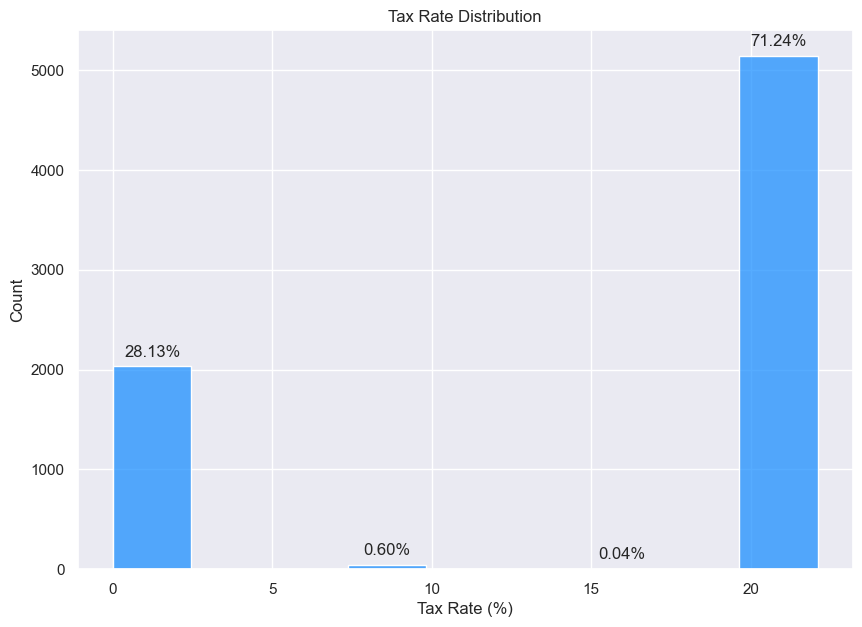

Tax rate with null or 0: 2014
Tax rate over 0% and under 20%: 55
Tax rate over 20% : 5144


In [17]:
# plot for tax rate and give the total value on the top of the bar if the value is 0% it will not show
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('darkgrid')
ax = sns.histplot(df_rate['tax_rate'], kde=False, color='dodgerblue', bins=9)
ax.set(xlabel='Tax Rate (%)', ylabel='Count')
ax.set_title('Tax Rate Distribution')
total = len(df_rate['tax_rate'])
for p in ax.patches:
    height = p.get_height()
    if height != 0:
        ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.2f}%'.format(100*height/total),
            ha="center")
plt.show()

# count number of data with tax rate 20% and under 21%, also over 21%
count0 = 0
count_20 = 0
countBetween = 0
for i in range (len(df_rate['tax_rate'])):
    if df_rate['tax_rate'][i] < 20 and df_rate['tax_rate'][i] >0:
        countBetween += 1
    elif df_rate['tax_rate'][i] >= 20:
        count_20 += 1
    elif df_rate['tax_rate'][i] == 0:
        count0 += 1
print('Tax rate with null or 0:',count0)
print('Tax rate over 0% and under 20%:',countBetween)
print('Tax rate over 20% :',count_20)

- Tax rate for lodiging in Bali is around 20 - 21%

In [18]:
#filter data with tax rate > 0 and < 20 and save the index
index_list = df_rate[(df_rate['tax_rate'] > 0) & (df_rate['tax_rate'] < 20)].index

#output df data with index that recorded in index_list
df_lowTax = df.loc[index_list]
df_lowTax.starRating.value_counts()

5.0    44
4.0     4
2.0     3
0.0     3
3.0     1
Name: starRating, dtype: int64

### Original Price/Rate

In [19]:
# Exstract original rate
for i in range (len(df['originalRate'])):
    df.loc[i, 'originalRate'] = df['originalRate'][i].split('"')[3]
df['originalRate'] = df['originalRate'].astype(int)
df.head(3)

,type,city,hotelFacilities,nearestPointOfInterests,starRating,bedDescription,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,numBreakfastIncluded,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,None,46.0,1227273,3,1,5,NaN,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,None,31.0,596694,2,1,5,NaN,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."
2,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4.0,None,52.0,1450413,2,1,5,NaN,1,1,1,1,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."


In [20]:
df.shape

(7221, 17)

In [21]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7221 entries, 0 to 7220
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     7221 non-null   object 
 1   city                     7221 non-null   object 
 2   hotelFacilities          7221 non-null   object 
 3   nearestPointOfInterests  7221 non-null   object 
 4   starRating               7221 non-null   float64
 5   bedDescription           18 non-null     object 
 6   size                     5137 non-null   object 
 7   originalRate             7221 non-null   int32  
 8   baseOccupancy            7221 non-null   int64  
 9   maxChildOccupancy        7221 non-null   int64  
 10  maxChildAge              7221 non-null   int64  
 11  numBreakfastIncluded     133 non-null    float64
 12  isBreakfastIncluded      7221 non-null   int64  
 13  isWifiIncluded           7221 non-null   int64  
 14  isRefundable            

In [22]:
# change size data type to float
df['size'] = df['size'].astype(float)
df['size'].dtype

dtype('float64')

---------

## Data Analysis and Cleaning

### Check Missing and Duplicate value

In [23]:
# crate dataframe for null value
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_value'])
df_null['null_value_percentage'] = df_null['null_value'] / len(df) * 100
df_null

,null_value,null_value_percentage
type,0,0.000000
city,0,0.000000
hotelFacilities,0,0.000000
nearestPointOfInterests,0,0.000000
starRating,0,0.000000
bedDescription,7203,99.750727
size,2084,28.860269
originalRate,0,0.000000
baseOccupancy,0,0.000000
maxChildOccupancy,0,0.000000


- Because the amount of NaN/NULL value in `numBreakfastIncluded` and `bedDescription` column is too high, we will drop this column
- `size` will be handled after some analysis

In [24]:
df.drop(['numBreakfastIncluded'], axis=1, inplace=True)
df.drop(['bedDescription'], axis=1, inplace=True)

In [25]:
# show index who has duplicate value
print('Total duplicated row = ', df.duplicated().sum())
# print duplicated data list index 1
df[df.duplicated(keep='first')]

Total duplicated row =  275


,type,city,hotelFacilities,nearestPointOfInterests,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
24,Resor,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""ELEVATOR""...","[{""landmarkId"":""6074967"",""geoId"":null,""name"":""...",5.0,80.0,6400397,2,1,5,1,1,0,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
25,Resor,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""ELEVATOR""...","[{""landmarkId"":""6074967"",""geoId"":null,""name"":""...",5.0,65.0,5808397,2,1,5,1,1,0,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
30,Resor,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""ELEVATOR""...","[{""landmarkId"":""6074967"",""geoId"":null,""name"":""...",5.0,65.0,5000397,2,1,5,0,1,0,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
32,Resor,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""ELEVATOR""...","[{""landmarkId"":""6074967"",""geoId"":null,""name"":""...",5.0,65.0,5408397,2,1,5,0,1,0,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
34,Resor,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""ELEVATOR""...","[{""landmarkId"":""6074967"",""geoId"":null,""name"":""...",5.0,80.0,6000397,2,1,5,0,1,0,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,Hotel,Badung,"[""CONCIERGE"",""CARPARK"",""WIFI_PUBLIC_AREA_SURCH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",5.0,36.0,1128481,1,0,0,0,0,0,0,[]
7210,Hotel,Badung,"[""CONCIERGE"",""CARPARK"",""WIFI_PUBLIC_AREA_SURCH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",5.0,56.0,1525148,1,0,0,0,0,0,0,[]
7218,Hostel,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",0.0,25.0,164187,1,0,8,1,1,1,0,"[""AIR_CONDITIONING"",""HAIR_DRYER"",""SHARED_BATHR..."
7219,Hostel,Badung,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",0.0,25.0,164187,1,0,8,1,1,1,0,"[""AIR_CONDITIONING"",""HAIR_DRYER"",""SHARED_BATHR..."


In [26]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(6946, 15)

### Data Statistics

In [27]:
originalRows = df.shape[0]

print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 6946
Total number of columns: 15


In [28]:
df.describe()

,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
count,6946.000000,4959.000000,6.946000e+03,6946.000000,6946.000000,6946.000000,6946.000000,6946.000000,6946.000000,6946.000000
mean,2.940901,110.373573,2.765252e+06,2.023179,0.489922,5.200547,0.479413,0.880651,0.401958,0.048229
std,1.549356,878.573270,7.782595e+06,1.403547,0.658531,4.367687,0.499612,0.324222,0.490329,0.214266
min,0.000000,0.000000,4.031300e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,24.000000,5.509640e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,35.000000,1.239669e+06,2.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,65.000000,2.977504e+06,2.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,36000.000000,3.175333e+08,30.000000,10.000000,17.000000,1.000000,1.000000,1.000000,1.000000


- Nilai minimum pada kolom `size` adalah 0, yang berarti ada data yang tidak valid.
- Nilai quartil atas pada kolom `baseOccupancy`, `size`, dan `originalRate` memiliki perbedaan yang sangat tinggi dengan nilai maximum

In [29]:
# print the number of unique values in each column
print('Number of unique values above 10 in each column:')
for i in df.describe().columns:
    if df[i].nunique() > 10:
        print(f'{i}: {df[i].nunique()}')

Number of unique values above 10 in each column:
starRating: 11
size: 330
originalRate: 3778
baseOccupancy: 17
maxChildAge: 18


In [30]:
# Drop rows if value in 'size' is 1 and below 1
for i in range(len(df)):
    x = df['size'][i]
    if x <= 1:
        df.drop(i, inplace=True, axis=0)

print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of deleted rows: {originalRows-df.shape[1]}')
print('Size Minimum value : {}'.format(df['size'].min()))

Total number of rows: 6908
Total number of deleted rows: 6931
Size Minimum value : 2.0


### Function

In [31]:
# count outlier with IQR
def iqr_outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    outliers = df[col][((df[col] < (q1 - 1-5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))]
    print('Number of outliers: '+ str(len(outliers)))
    print('Max outlier value: '+ str(outliers.max()))
    print('Min outlier value: '+ str(outliers.min()))   
    return df.loc[(df[col] <= q3 + 1.5 * iqr) & (df[col] >= q1 - 1.5 * iqr)]

### Data Distribution

#### OriginalRate Distribution

OriginalRate
maximum value : 317533333
minimum value : 40313
skew value : 21.34


<Figure size 1600x800 with 0 Axes>

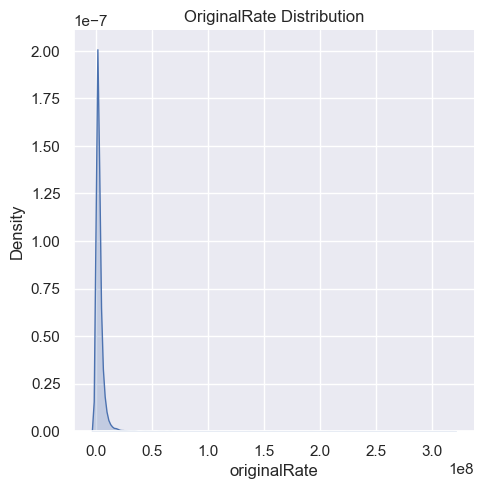

In [32]:
# OriginalRate Statistics
print('OriginalRate')
print(f'maximum value : {df.originalRate.max()}')
print(f'minimum value : {df.originalRate.min()}')
print(f'skew value : {round(df.originalRate.skew(), 2)}')

# OriginalRate Distribution
sns.set_style('darkgrid')
plt.figure(figsize=(20, 10), dpi=80)
sns.displot(df,x="originalRate", kind="kde", fill=True).set(title='OriginalRate Distribution')
plt.show()

In [33]:
# Remove outlier in OriginalRate
df_len = len(df)
df = iqr_outlier(df, 'originalRate')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(f'Remaining data : {df.shape[0]}')

Number of outliers: 554
Max outlier value: 317533333
Min outlier value: 6617993
Deleted row : 554
Remaining data : 6354


OriginalRate
Maximum value : 6611571
Minimum value : 40313
Skew value : 1.3


<Figure size 1600x800 with 0 Axes>

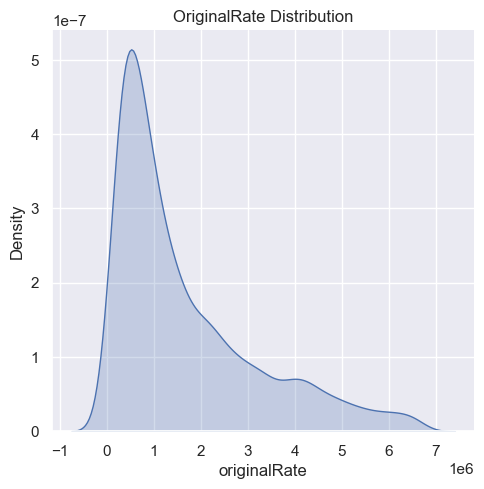

In [34]:
# OriginalRate Statistics
print('OriginalRate')
print(f'Maximum value : {df.originalRate.max()}')
print(f'Minimum value : {df.originalRate.min()}')
print(f'Skew value : {round(df.originalRate.skew(), 2)}')

# OriginalRate Distribution after removing outlier
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.displot(df,x="originalRate", kind="kde", fill=True).set(title='OriginalRate Distribution')
plt.show()

#### OriginalRate based on starRating

OriginalRate Distribution by starRating
3.0    1958
4.0    1772
0.0     967
5.0     597
2.0     539
1.0     308
3.5     132
2.5      56
1.5      14
4.5      11
Name: starRating, dtype: int64


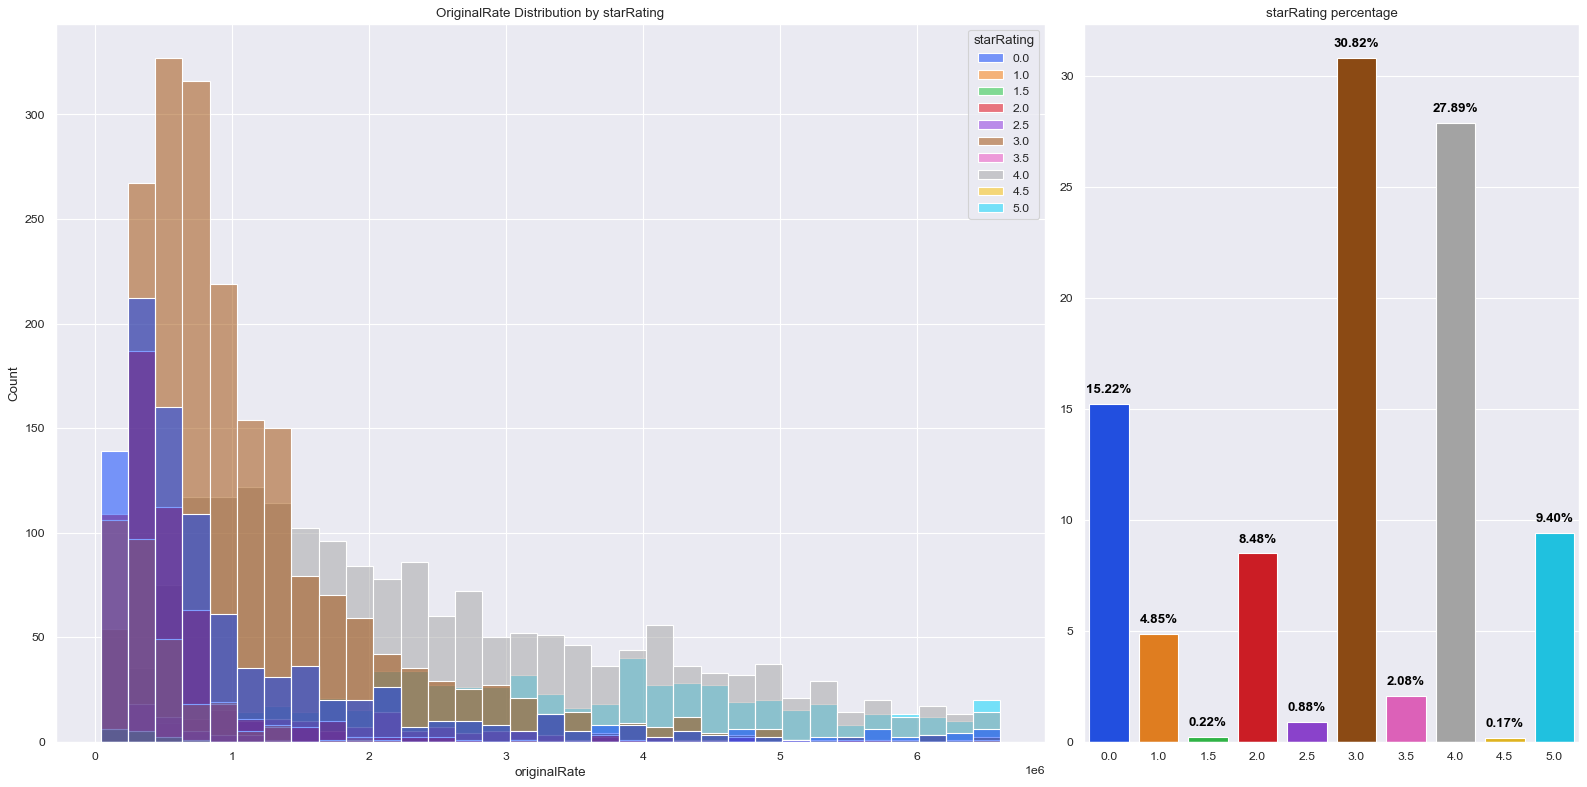

In [35]:
# starRating Distribution
value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i) for i in value_percentage.index]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

# starRating percentage plot
sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for container in ax[1].containers:
    for bar in container.patches:
        v = bar.get_height()
        bar_center = bar.get_x() + bar.get_width() / 2
        ax[1].text(bar_center, v + 0.5, f'{v:.2f}%', color='black', fontweight='bold', ha='center')
fig.tight_layout()

- Because the amount of `starRating` with 0.5 star is to low, we will handle it with removing 0.5 `starRating`
- Change `starRating` to integer

OriginalRate Distribution by starRating
3    2090
4    1783
0     967
5     597
2     595
1     322
Name: starRating, dtype: int64


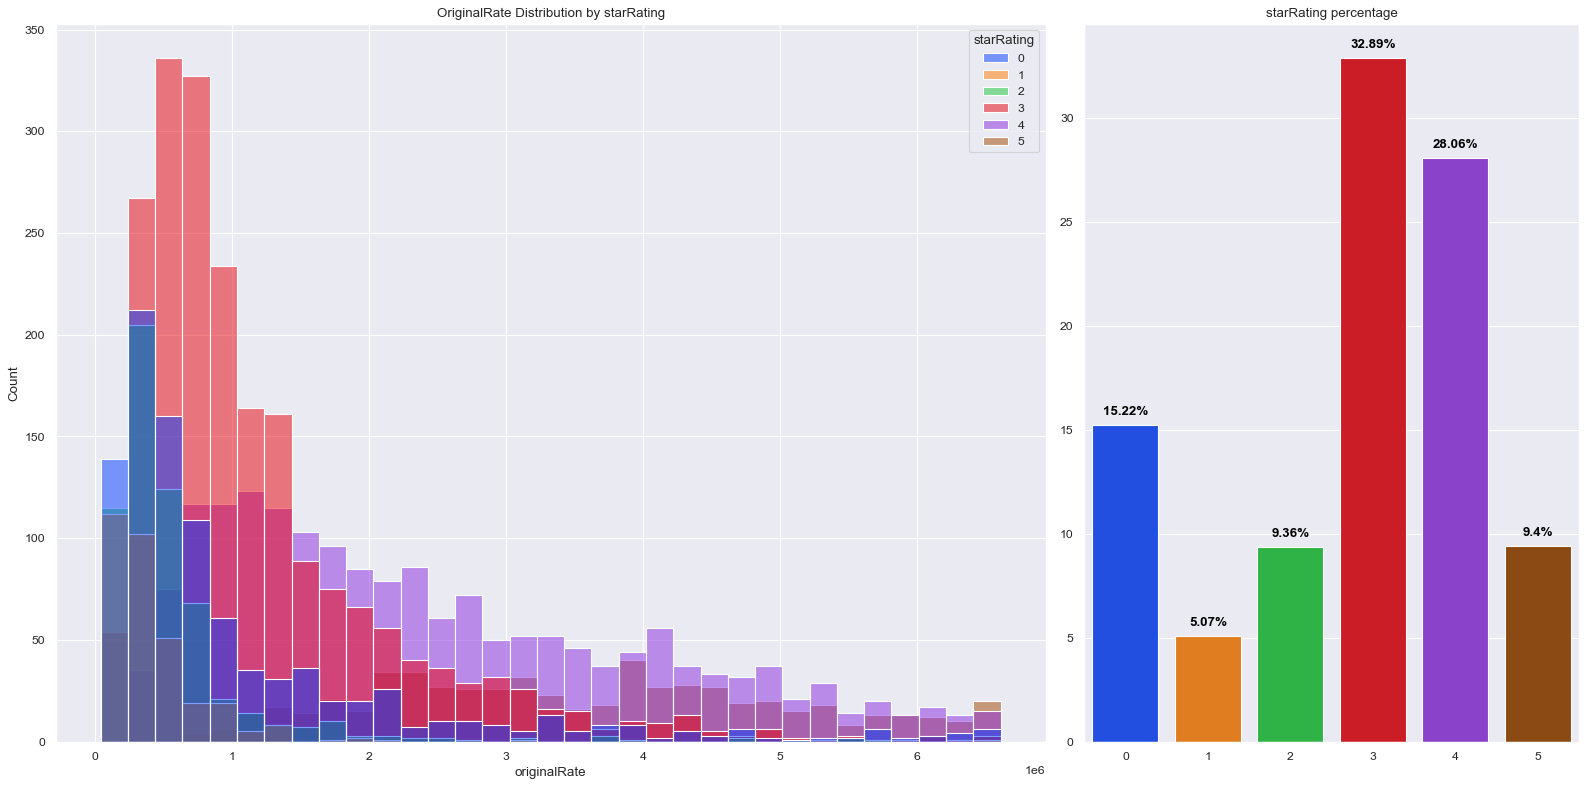

In [36]:
# change .5 star
# df.loc[i, 'originalRate'] = df['originalRate'][i].split('"')[11]
df.loc[df['starRating'] == 1.5, 'starRating'] = 1
df.loc[df['starRating'] == 2.5, 'starRating'] = 2
df.loc[df['starRating'] == 3.5, 'starRating'] = 3
df.loc[df['starRating'] == 4.5, 'starRating'] = 4
# change starRating to interger
df = df.astype({'starRating': int})

value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i) for i in range(len(value_percentage))]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for i, (v, index) in enumerate(value_percentage_list_sorted):
    ax[1].text(index, v + 0.5, str(round(v, 2)) + '%', color='black', fontweight='bold', ha='center')
    
fig.tight_layout()

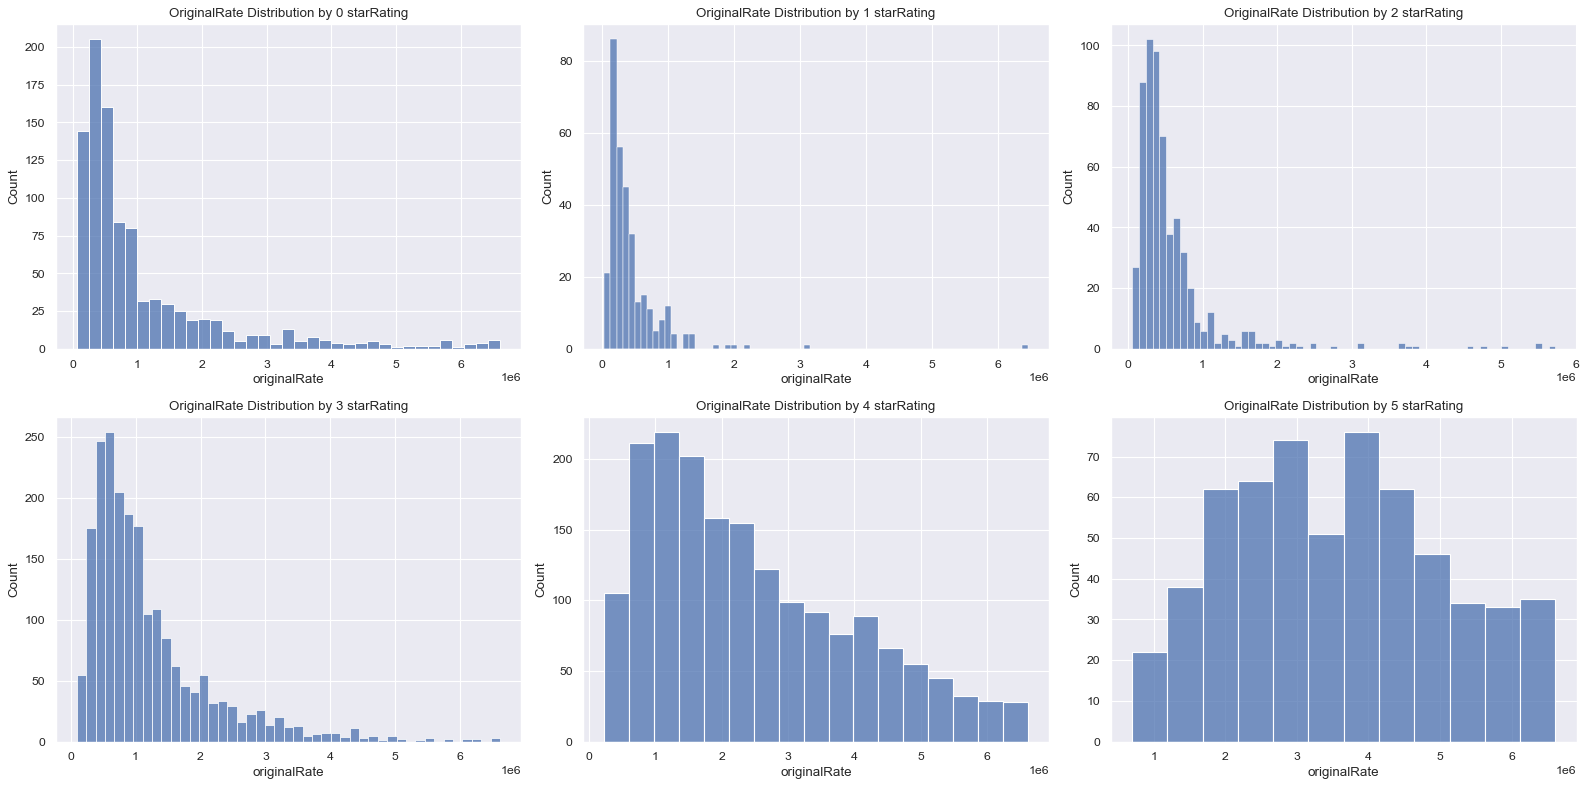

In [37]:
filtered_0 = df[df['starRating'] == 0.0]
filtered_1 = df[df['starRating'] == 1.0]
filtered_2 = df[df['starRating'] == 2.0]
filtered_3 = df[df['starRating'] == 3.0]
filtered_4 = df[df['starRating'] == 4.0]
filtered_5 = df[df['starRating'] == 5.0]

# OriginalRate Distribution by starRating using hisplot inside subplot
fig, ax = plt.subplots(2,3, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 1, 1]})
sns.histplot(filtered_0,x="originalRate", ax=ax[0,0]).set(title='OriginalRate Distribution by 0 starRating')
sns.histplot(filtered_1,x="originalRate", ax=ax[0,1]).set(title='OriginalRate Distribution by 1 starRating')
sns.histplot(filtered_2,x="originalRate", ax=ax[0,2]).set(title='OriginalRate Distribution by 2 starRating')
sns.histplot(filtered_3,x="originalRate", ax=ax[1,0]).set(title='OriginalRate Distribution by 3 starRating')
sns.histplot(filtered_4,x="originalRate", ax=ax[1,1]).set(title='OriginalRate Distribution by 4 starRating')
sns.histplot(filtered_5,x="originalRate", ax=ax[1,2]).set(title='OriginalRate Distribution by 5 starRating')
fig.tight_layout()

In [38]:
df.groupby('starRating').agg(
    {'originalRate': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

originalRate                                             \
                    mean           std     min      max  <lambda_0>   
starRating                                                            
0           1.084746e+06  1.259045e+06   60607  6611570   330579.00   
1           4.462668e+05  4.969806e+05   40313  6446281   195913.25   
2           5.933323e+05  6.836323e+05   55096  5730028   268854.50   
3           1.200529e+06  9.682570e+05   95041  6611571   550964.00   
4           2.463116e+06  1.542309e+06  231405  6611571  1194903.50   
5           3.577792e+06  1.476333e+06  698347  6611571  2383571.00   

                                   
               median  <lambda_1>  
starRating                         
0            584023.0  1276033.00  
1            309917.0   512193.75  
2            413223.0   656328.50  
3            893939.5  1487603.00  
4           2103719.0  3493823.50  
5           3504384.0  4608688.00

In [39]:
q1b1 = df[df['starRating'] == 1.0]['originalRate'].quantile(0.25)
q1b2 = df[df['starRating'] == 2.0]['originalRate'].quantile(0.25)
q1b3 = df[df['starRating'] == 3.0]['originalRate'].quantile(0.25)
q1b4 = df[df['starRating'] == 4.0]['originalRate'].quantile(0.25)
q1b5 = df[df['starRating'] == 5.0]['originalRate'].quantile(0.25)

In [40]:
# change starRating value based on originalRate 25% from other starRating
for i in range(0,5):
    if i == 0:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b1), 'starRating'] += 1.0
    elif i == 1:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b2), 'starRating'] += 1.0
    elif i == 2:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b3), 'starRating'] += 1.0
    elif i == 3:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b4), 'starRating'] += 1.0
    elif i == 4:
        df.loc[(df['starRating'] == i) & (df['originalRate'] > q1b5), 'starRating'] += 1.0

OriginalRate Distribution by starRating
3    1790
5    1732
4    1707
2     823
1     201
0     101
Name: starRating, dtype: int64


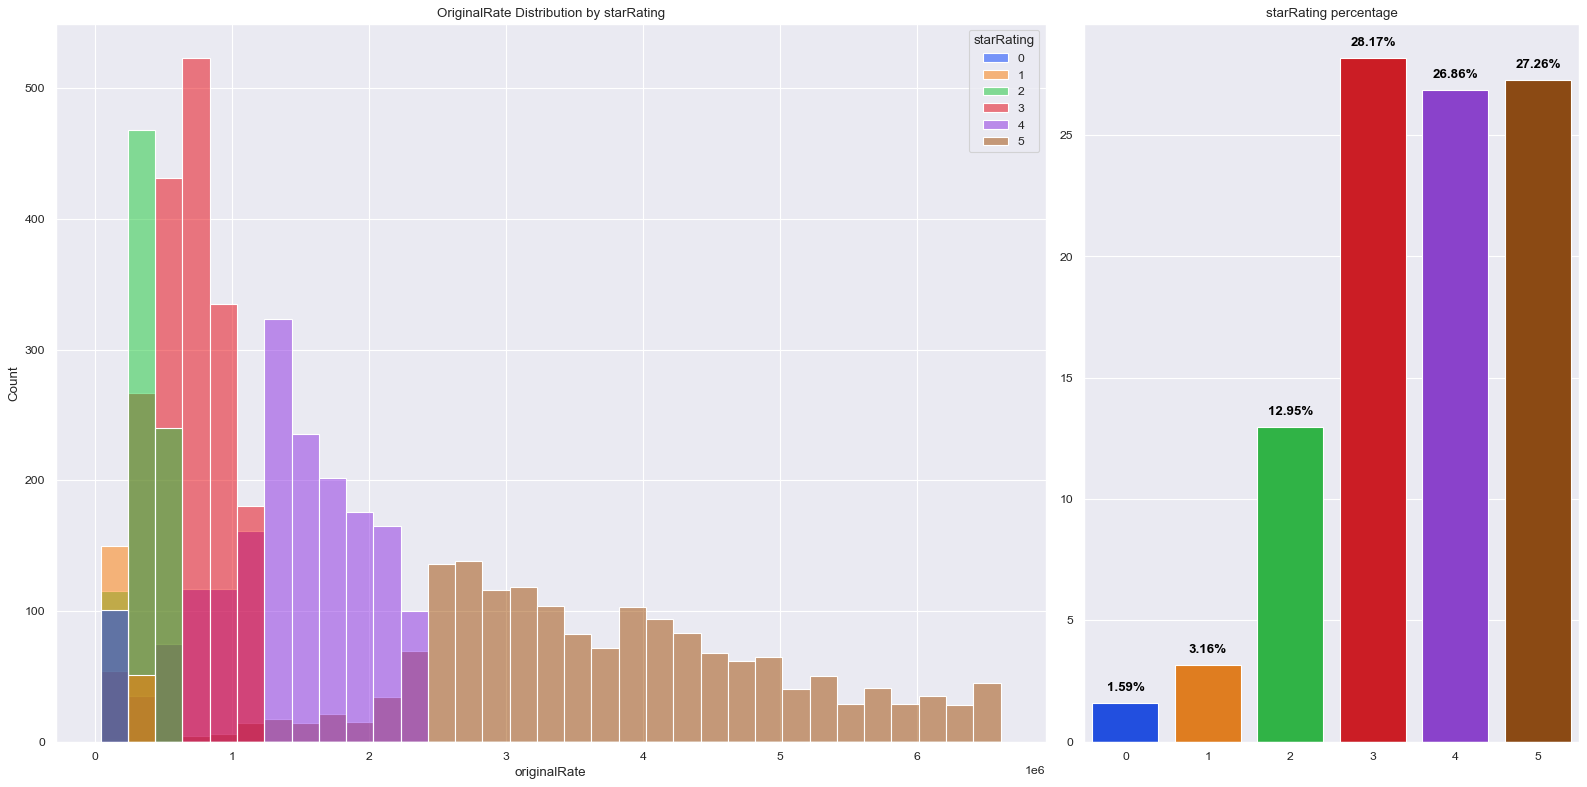

In [41]:
value = df.starRating.value_counts()
print('OriginalRate Distribution by starRating')
print(value)

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i) for i in range(len(value_percentage))]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for i, (v, index) in enumerate(value_percentage_list_sorted):
    ax[1].text(index, v + 0.5, str(round(v, 2)) + '%', color='black', fontweight='bold', ha='center')
    
fig.tight_layout()

In [42]:
df.groupby('starRating').agg({'originalRate': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

originalRate                                                       \
                    mean           std     min      max <lambda_0>     median   
starRating                                                                      
0           1.532357e+05  3.149420e+04   60607   195900   130028.0   157025.0   
1           1.972876e+05  4.900288e+04   40313   267769   163413.0   206612.0   
2           3.595947e+05  1.110327e+05   55096   550964   277396.5   357025.0   
3           6.933194e+05  2.505965e+05   95041  1193756   506887.0   694215.0   
4           1.464302e+06  5.004292e+05  231405  2380165  1157025.0  1453719.0   
5           3.747564e+06  1.261685e+06  698347  6611571  2754821.0  3553719.0   

                        
            <lambda_1>  
starRating              
0            183471.00  
1            239669.00  
2            446117.00  
3            881543.00  
4           1861799.50  
5           4587356.75

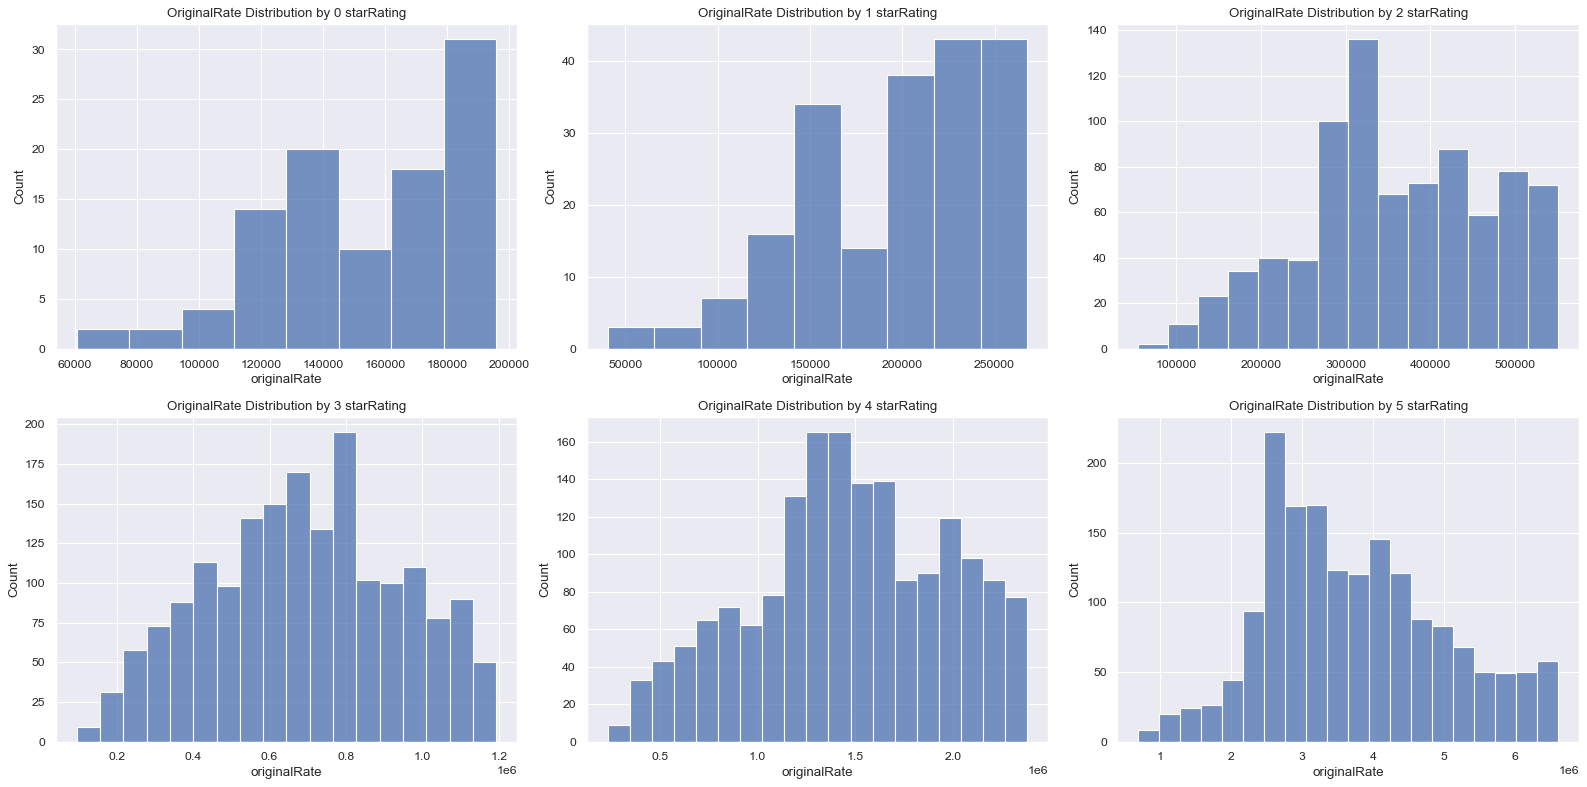

In [43]:
filtered_0 = df[df['starRating'] == 0]
filtered_1 = df[df['starRating'] == 1]
filtered_2 = df[df['starRating'] == 2]
filtered_3 = df[df['starRating'] == 3]
filtered_4 = df[df['starRating'] == 4]
filtered_5 = df[df['starRating'] == 5]

# OriginalRate Distribution by starRating using hisplot inside subplot
fig, ax = plt.subplots(2,3, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 1, 1]})
sns.histplot(filtered_0,x="originalRate", ax=ax[0,0]).set(title='OriginalRate Distribution by 0 starRating')
sns.histplot(filtered_1,x="originalRate", ax=ax[0,1]).set(title='OriginalRate Distribution by 1 starRating')
sns.histplot(filtered_2,x="originalRate", ax=ax[0,2]).set(title='OriginalRate Distribution by 2 starRating')
sns.histplot(filtered_3,x="originalRate", ax=ax[1,0]).set(title='OriginalRate Distribution by 3 starRating')
sns.histplot(filtered_4,x="originalRate", ax=ax[1,1]).set(title='OriginalRate Distribution by 4 starRating')
sns.histplot(filtered_5,x="originalRate", ax=ax[1,2]).set(title='OriginalRate Distribution by 5 starRating')
fig.tight_layout()

### Handling `size` missing value

Missing value will be handled by using randomized value from 25% and 75% quantile of `size` based on every `starRating`

In [44]:
df.groupby('starRating').agg({'size': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

size                                                        
                  mean          std  min      max <lambda_0> median <lambda_1>
starRating                                                                    
0            21.428571    10.534940  4.0     80.0      15.00   20.0       25.0
1            23.891503    35.915449  2.0    441.0      16.00   19.0       25.0
2            23.223021    29.126477  3.5    625.0      15.00   20.0       25.0
3            61.841964  1029.397823  3.0  36000.0      20.04   28.0       35.0
4            56.872724   139.390133  4.0   2600.0      28.00   36.0       50.0
5           192.528144  1320.910898  8.0  33000.0      45.00   75.0      140.0

In [45]:
df['size'].fillna(0, inplace=True)
np.random.seed(123)

for i in range (0,6):
    low_limit = df[df['starRating'] == i]['size'].quantile(0.25)
    high_limit = df[df['starRating'] == i]['size'].quantile(0.75)
    df.loc[(df['size'] == 0) & (df['starRating'] == i), 'size'] = np.random.uniform(low_limit, high_limit, size=len(df.loc[(df['size'] == 0) & (df['starRating'] == i), 'size']))

In [46]:
df.groupby('starRating').agg({'size': ['mean', 'std', 'min', 'max',lambda x: x.quantile(0.25),'median', lambda x: x.quantile(0.75)]})

size                                                        \
                  mean          std       min      max <lambda_0>     median   
starRating                                                                     
0            19.740425     9.926778  4.000000     80.0  13.618638  18.389379   
1            21.545809    31.681686  2.000000    441.0  12.674023  17.000000   
2            19.811635    25.208385  0.064514    625.0  12.000000  16.607287   
3            47.101034   850.713710  0.002457  36000.0  16.490767  24.000000   
4            49.065720   121.816584  4.000000   2600.0  25.000000  35.000000   
5           154.413413  1123.845954  0.014954  33000.0  40.000000  68.422704   

                       
           <lambda_1>  
starRating             
0                24.0  
1                24.0  
2                24.0  
3                30.0  
4                45.0  
5               110.0

In [47]:
originalRows = df.shape[0]
df.reset_index(drop=True, inplace=True)
# Drop rows if value in 'size' below 2
for i in range(len(df)):
    x = df['size'][i]
    if x < 2:
        df.drop(i, inplace=True, axis=0)

print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of deleted rows: {originalRows - df.shape[1]}')
print('Size Minimum value : {}'.format(df['size'].min()))

Total number of rows: 6286
Total number of deleted rows: 6339
Size Minimum value : 2.0


### Base Occupancy Distribution

baseOccupancy
maximum value : 30
minimum value : 1
skew value : 6.19


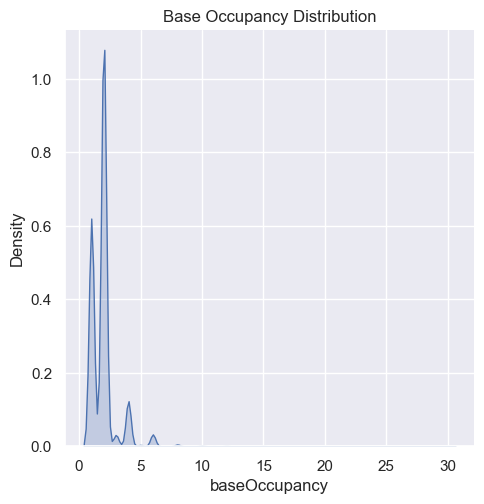

In [48]:
print('baseOccupancy')
print(f'maximum value : {df.baseOccupancy.max()}')
print(f'minimum value : {df.baseOccupancy.min()}')
print(f'skew value : {round(df.baseOccupancy.skew(), 2)}')

sns.displot(df,x="baseOccupancy", kind="kde", fill=True).set(title='Base Occupancy Distribution')

In [49]:
df_len = len(df)
df = iqr_outlier(df, 'baseOccupancy')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(f'Remaining data : {df.shape[0]}')

Number of outliers: 550
Max outlier value: 30
Min outlier value: 4
Deleted row : 550
Remaining data : 5736


baseOccupancy
maximum value : 3
minimum value : 1
skew value : -0.3


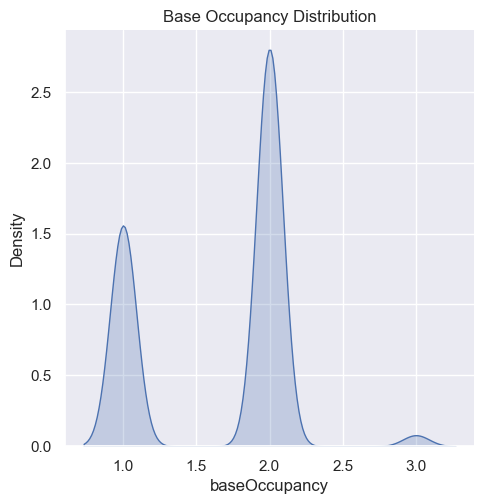

In [50]:
print('baseOccupancy')
print(f'maximum value : {df.baseOccupancy.max()}')
print(f'minimum value : {df.baseOccupancy.min()}')
print(f'skew value : {round(df.baseOccupancy.skew(), 2)}')

sns.displot(df,x="baseOccupancy", kind="kde", fill=True).set(title='Base Occupancy Distribution')

### Max Child Age Distribution

In [51]:
df_len = len(df)
df = iqr_outlier(df, 'maxChildAge')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(f'Remaining data : {df.shape[0]}')

Number of outliers: 0
Max outlier value: nan
Min outlier value: nan
Deleted row : 0
Remaining data : 5736


maxChildAge
maximum value : 17
minimum value : 0
skew value : 0.24


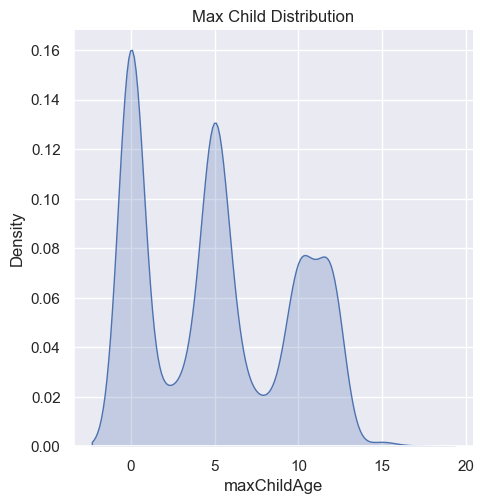

In [52]:
print('maxChildAge')
print(f'maximum value : {df.maxChildAge.max()}')
print(f'minimum value : {df.maxChildAge.min()}')
print(f'skew value : {round(df.maxChildAge.skew(), 2)}')

sns.displot(df,x="maxChildAge", kind="kde", fill=True).set(title='Max Child Distribution')

#### Size Distribution 

Size
Maximum value : 36000.0
Minimum value : 2.0
Skew value : 51.58115091171687


<Figure size 1600x800 with 0 Axes>

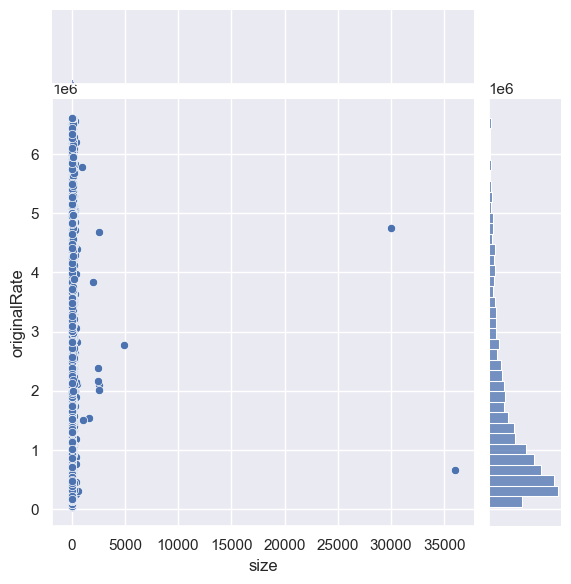

In [53]:
# Size Statistics
print('Size')
print('Maximum value : {}'.format(df['size'].max()))
print('Minimum value : {}'.format(df['size'].min()))
print('Skew value : {}'.format(df['size'].skew()))

# Size Distribution plot
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [54]:
df_len = len(df)
df = iqr_outlier(df, 'size')
df_len = df_len - len(df)
print(f'Deleted row : {df_len}')
print(f'Remaining data : {df.shape[0]}')

Number of outliers: 576
Max outlier value: 36000.0
Min outlier value: 83.0
Deleted row : 576
Remaining data : 5160


Size
maximum value : 82.45821234242426
minimum value : 2.0
skew value : 0.9462180916729102


<Figure size 1600x800 with 0 Axes>

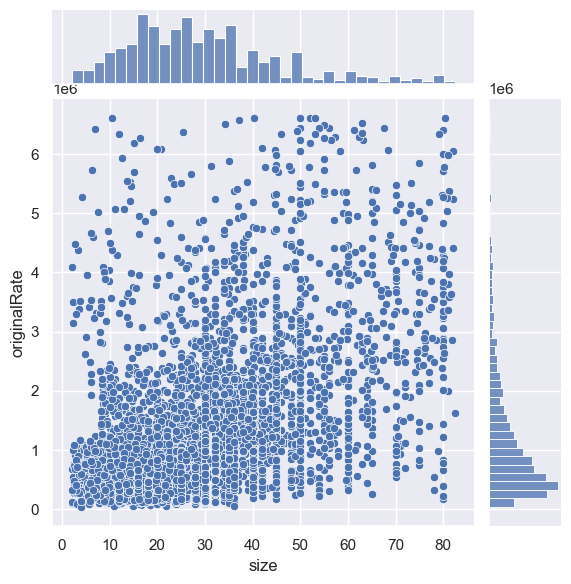

In [55]:
# Size Statistics
print('Size')
print('maximum value : {}'.format(df['size'].max()))
print('minimum value : {}'.format(df['size'].min()))
print('skew value : {}'.format(df['size'].skew()))

# Size Distribution plot
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

In [56]:
# Output total deleted rows
print(f'Total rows : {df.shape[0]}')
print(f'Total deleted rows : {originalRows - df.shape[0]}')

Total rows : 5160
Total deleted rows : 1194


## Export Data to CSV

In [57]:
df.to_csv('../Dataset/clean_data.csv', index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5160 entries, 0 to 6353
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     5160 non-null   object 
 1   city                     5160 non-null   object 
 2   hotelFacilities          5160 non-null   object 
 3   nearestPointOfInterests  5160 non-null   object 
 4   starRating               5160 non-null   int32  
 5   size                     5160 non-null   float64
 6   originalRate             5160 non-null   int32  
 7   baseOccupancy            5160 non-null   int64  
 8   maxChildOccupancy        5160 non-null   int64  
 9   maxChildAge              5160 non-null   int64  
 10  isBreakfastIncluded      5160 non-null   int64  
 11  isWifiIncluded           5160 non-null   int64  
 12  isRefundable             5160 non-null   int64  
 13  hasLivingRoom            5160 non-null   int64  
 14  roomFacilities          

# Data Analysis

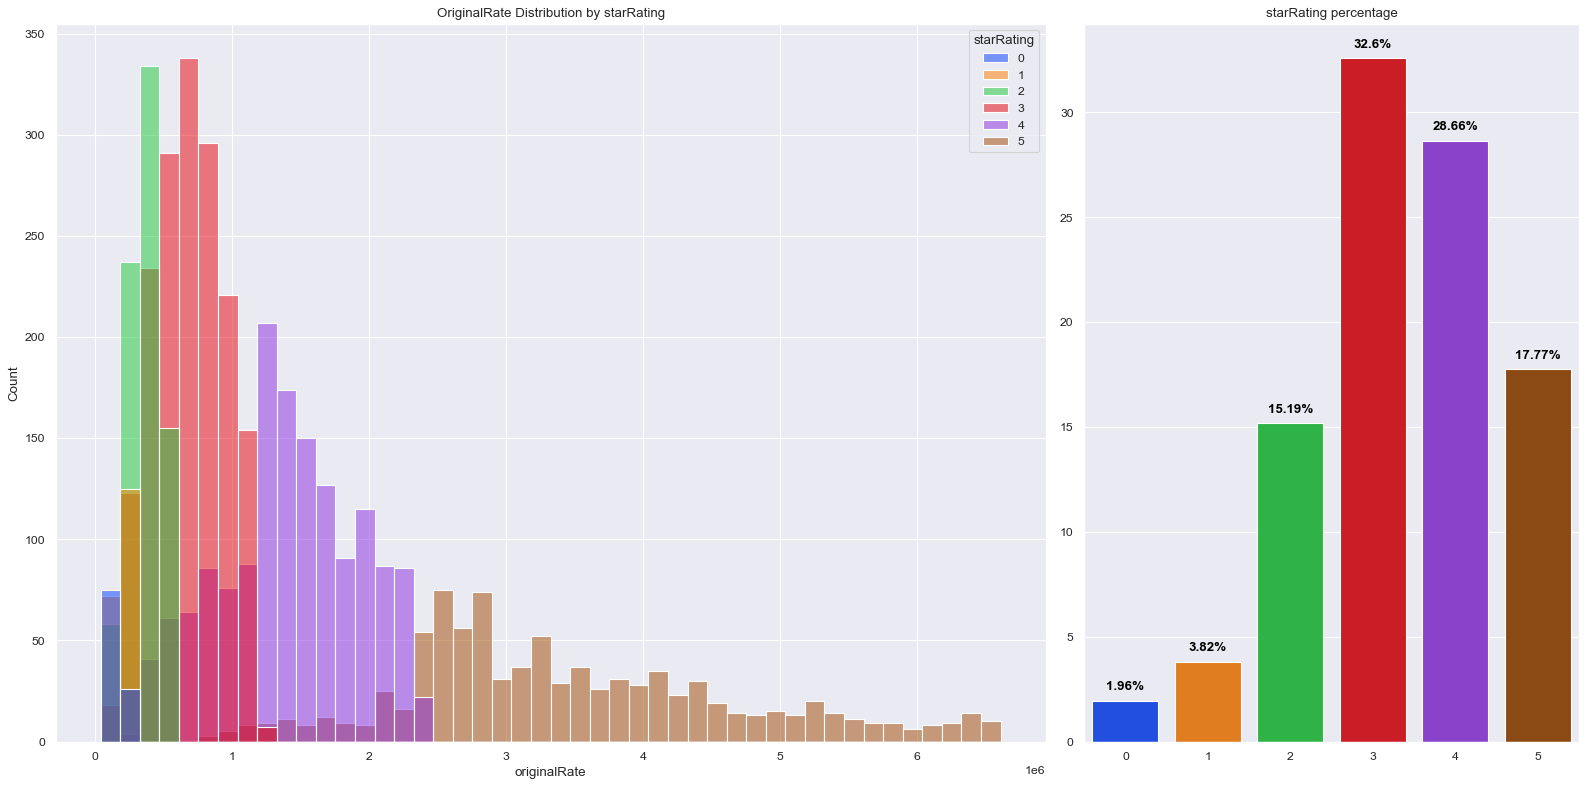

In [58]:
value = df.starRating.value_counts()

# starRating Distribution by percentage
value_percentage = value / len(df) * 100

# create a list of tuples where each tuple contains the value and index of each element in the value_percentage series
value_percentage_list = [(value_percentage[i], i) for i in range(len(value_percentage))]

# sort the list by the value in descending order
value_percentage_list_sorted = sorted(value_percentage_list, reverse=True)

fig, ax = plt.subplots(1,2, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 0.5]})
sns.histplot(df,x="originalRate", hue='starRating' ,palette='bright', ax=ax[0]).set(title='OriginalRate Distribution by starRating')

sns.barplot(x=value_percentage.index, y=value_percentage.values, palette='bright', ax=ax[1]).set(title='starRating percentage')

# add the percentage text using the sorted list
for i, (v, index) in enumerate(value_percentage_list_sorted):
    ax[1].text(index, v + 0.5, str(round(v, 2)) + '%', color='black', fontweight='bold', ha='center')
    
fig.tight_layout()

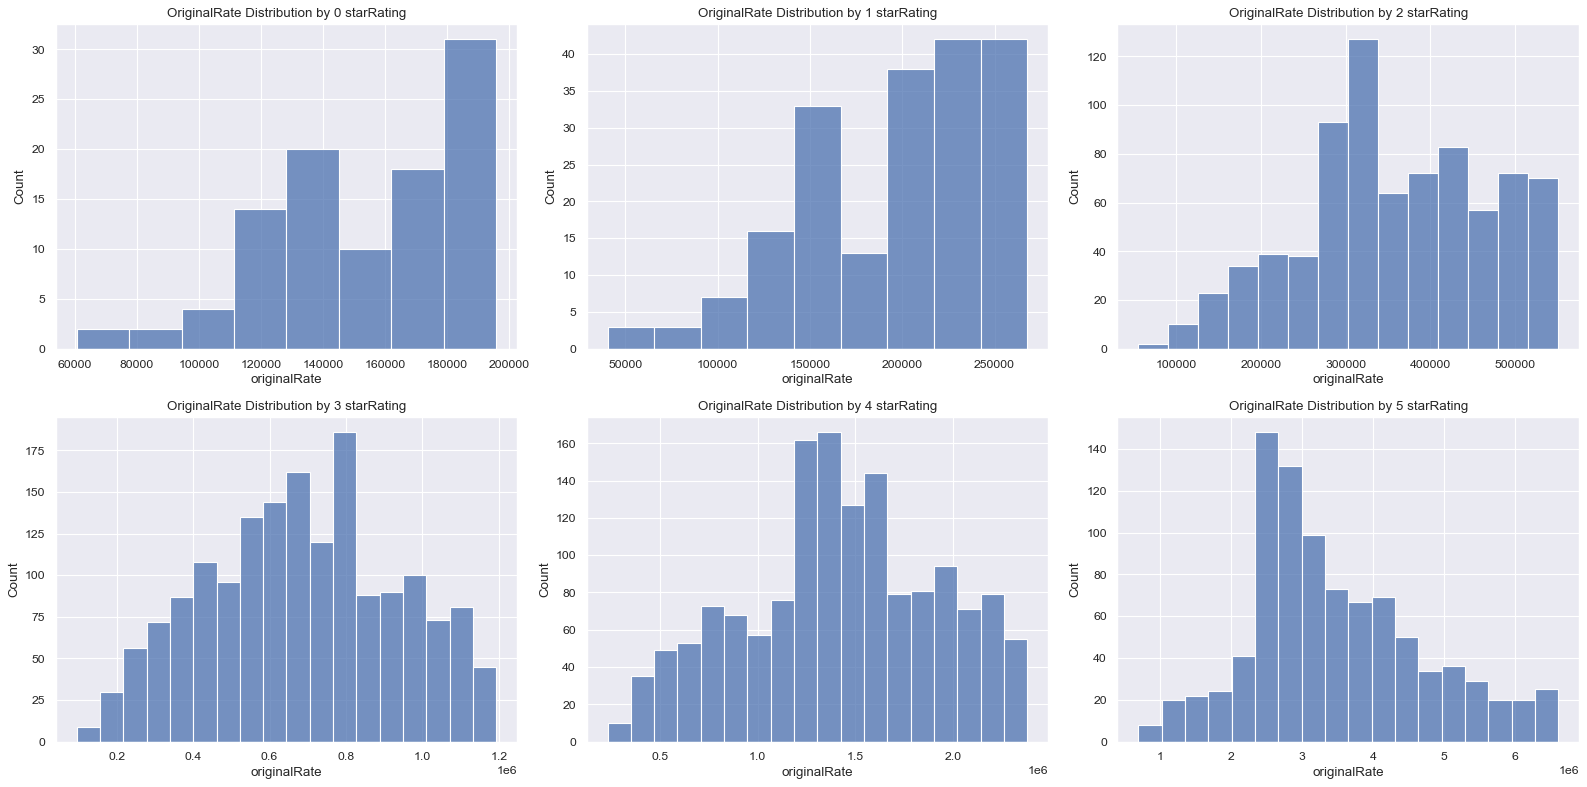

In [59]:
filtered_0 = df[df['starRating'] == 0]
filtered_1 = df[df['starRating'] == 1]
filtered_2 = df[df['starRating'] == 2]
filtered_3 = df[df['starRating'] == 3]
filtered_4 = df[df['starRating'] == 4]
filtered_5 = df[df['starRating'] == 5]

# OriginalRate Distribution by starRating using hisplot inside subplot
fig, ax = plt.subplots(2,3, figsize=(20, 10), dpi=80, gridspec_kw={'width_ratios': [1, 1, 1]})
sns.histplot(filtered_0,x="originalRate", ax=ax[0,0]).set(title='OriginalRate Distribution by 0 starRating')
sns.histplot(filtered_1,x="originalRate", ax=ax[0,1]).set(title='OriginalRate Distribution by 1 starRating')
sns.histplot(filtered_2,x="originalRate", ax=ax[0,2]).set(title='OriginalRate Distribution by 2 starRating')
sns.histplot(filtered_3,x="originalRate", ax=ax[1,0]).set(title='OriginalRate Distribution by 3 starRating')
sns.histplot(filtered_4,x="originalRate", ax=ax[1,1]).set(title='OriginalRate Distribution by 4 starRating')
sns.histplot(filtered_5,x="originalRate", ax=ax[1,2]).set(title='OriginalRate Distribution by 5 starRating')
fig.tight_layout()

<Figure size 1600x800 with 0 Axes>

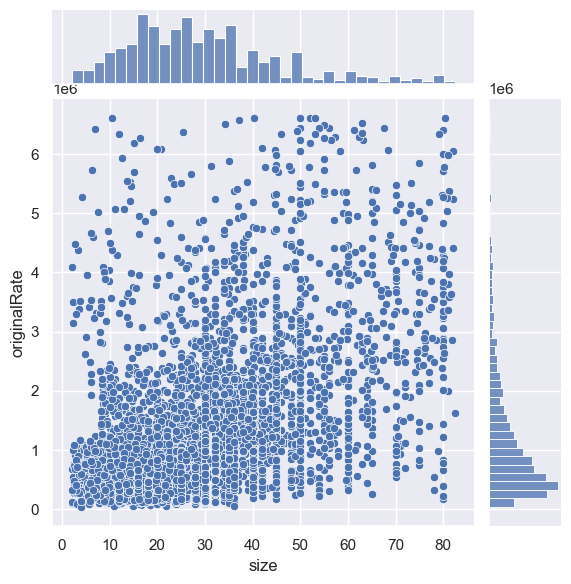

In [60]:
# Size Distribution plot
plt.figure(figsize=(20, 10), dpi=80)
sns.set_style('darkgrid')
sns.jointplot(data=df, x='size', y='originalRate')
plt.show()

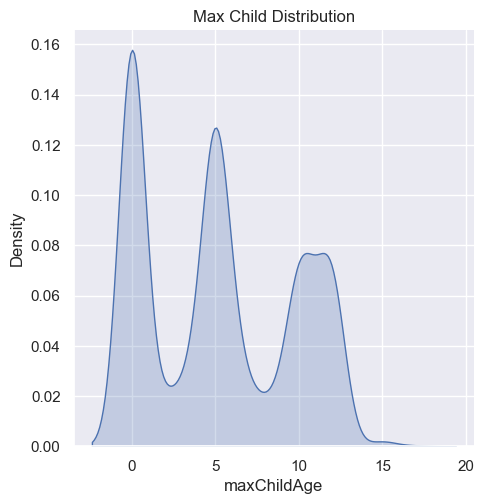

In [61]:
sns.displot(df,x="maxChildAge", kind="kde", fill=True).set(title='Max Child Distribution')

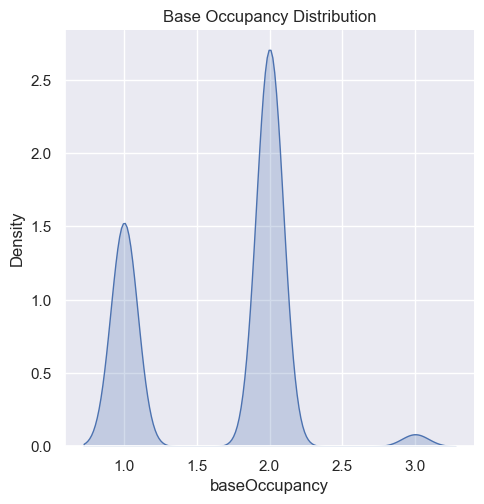

In [62]:
sns.displot(df,x="baseOccupancy", kind="kde", fill=True).set(title='Base Occupancy Distribution')